# Step 1: Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Step 2: Read Dataset

In [35]:
data = pd.read_csv('Task2a_dataset.csv')
data.head()

,Hours Studied,Marks Scored
0,1,50
1,2,55
2,3,65
3,4,70
4,5,75


# Step 3: Perform Feature Scaling and Split Data

In [36]:
X = data[['Hours Studied']]
Y = data['Marks Scored']

# Initialize the scaler
scaler = StandardScaler()

# Scale the feature (X) and response variable (Y)
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.values.reshape(-1, 1))

# Split scaled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

# Flatten Y_train and Y_test for manual calculations
Y_train = Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Manually Calculate Regression Coefficients

In [37]:
X_train_np = X_train.to_numpy().flatten()
Y_train_np = Y_train.to_numpy().flatten()

# Calculate means
mean_X = np.mean(X_train_np)
mean_Y = np.mean(Y_train_np)

# Calculate beta1 and beta0
numerator = np.sum((X_train_np - mean_X) * (Y_train_np - mean_Y))
denominator = np.sum((X_train_np - mean_X) ** 2)
Beta1 = numerator / denominator
Beta0 = mean_Y - Beta1 * mean_X

print(f"Manually Computed Coefficients: Beta0 = {Beta0}, Beta1 = {Beta1}")

Manually Computed Coefficients: Beta0 = 44.400000000000006, Beta1 = 6.4


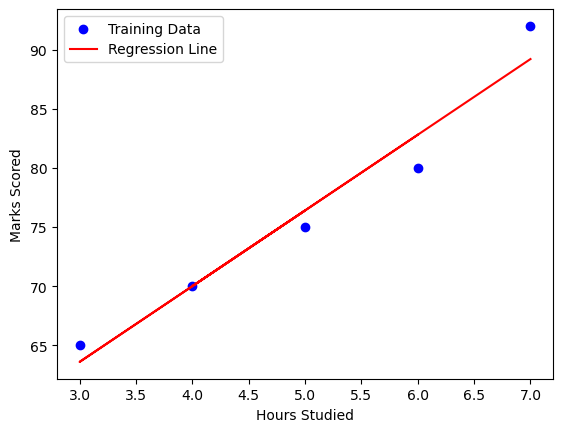

In [38]:
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.plot(X_train, Beta1 * X_train + Beta0, color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.legend()
plt.show()


# Step 5: Train ML Regressor Model

In [39]:
model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients
Beta0_comp = model.intercept_
Beta1_comp = model.coef_[0]
print(f"Computed Coefficients using ML Model: Beta0 = {Beta0_comp}, Beta1 = {Beta1_comp}")


Computed Coefficients using ML Model: Beta0 = 44.400000000000006, Beta1 = 6.3999999999999995


# Step 6: Predict Outputs

In [40]:
Y_pred = model.predict(X_test)
print(f"Predictions for Test Data:\n{Y_pred}")

Predictions for Test Data:
[50.8 57.2]


# Step 7: Evaluate Model Performance

In [41]:
r2 = r2_score(Y_test, Y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.5615999999999985
